In [1]:
import datetime
import pickle
import os

import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials 

from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

%matplotlib inline

# Spotify search and cache

In [2]:
sp = spotipy.Spotify() 
client_credentials_manager = SpotifyClientCredentials(client_id=os.environ["SPOTIPY_CLIENT_ID"], client_secret=os.environ["SPOTIPY_CLIENT_SECRET"]) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

results = sp.search(q='Last Christmas', type='track')
items = results['tracks']['items']

while results['tracks']['next']:
    results = sp.next(results['tracks'])
    items += [item for item in results['tracks']['items'] if "LAST CHRISTMAS" in item['name'].upper()]  # silly
    
pickle.dump(items, open("last-christmas-2019.pickle", "wb"))

# Data frame

In [3]:
items = pickle.load(open("last-christmas-2019.pickle", "rb"))
df = pd.DataFrame(data=[(item['id'], item['name'], ", ".join(sorted([a['name'] for a in item['artists']])), item['album']['name']) for item in items], columns=['Id', 'Name', 'Artists', 'Album'])

## Number of tracks
How many tracks did we find this year?

In [4]:
df.Id.count()

5593

## Unique artists
Number of unique artists with a song named Last Christmas

In [5]:
len(df.Artists.unique())

2101

## Distribution of released tracks by artist
How is the number of tracks distributed on the artists?

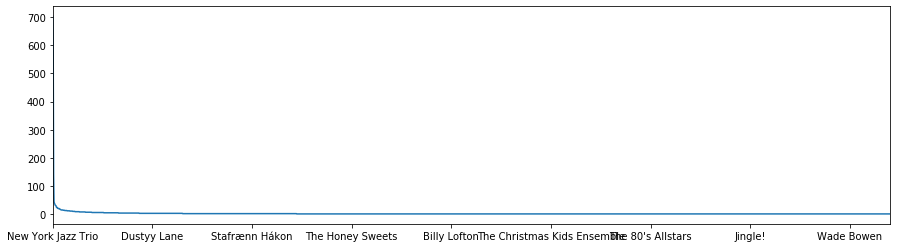

In [6]:
df.Artists.value_counts().plot(figsize=(15, 4))

Zooming in on the top 50

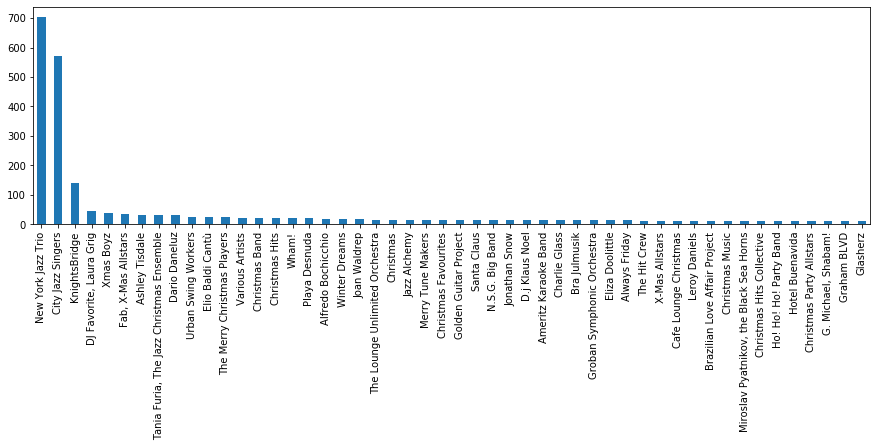

In [7]:
df.Artists.value_counts().head(50).plot(kind="bar", figsize=(15, 4))

## Number of tracks by Wham!
How many releases of the original wham! track?

In [8]:
df[df.Artists.str.match('Wham!', case=False)].reset_index()[['Name', 'Album']]

,Name,Album
0,Last Christmas - Remastered,Twenty Five
1,Last Christmas,LAST CHRISTMAS
2,Last Christmas,Christmas Hits
3,Last Christmas,George Michael & Wham! Last Christmas: The Ori...
4,Last Christmas - Pudding Mix,LAST CHRISTMAS
5,Last Christmas,The Classic Christmas '80s Album
6,Last Christmas,Xmas Hits
7,Last Christmas - Pudding Mix,The Final
8,Last Christmas - Single Version,A Very Special Christmas - Essential
9,Last Christmas,Caroling at Christmas


# Add to playlist
Get one track per artist and track name - as there are multiple releases of the same song but we want the remix tracks.
Create a playlist, starting with the artists who has the most songs.

In [9]:
scope = 'playlist-modify-public,playlist-modify-private'
token = util.prompt_for_user_token(os.environ["SPOTIFY_USERNAME"], scope)
sp = spotipy.Spotify(auth=token)

In [10]:
result = sp.user_playlist_create(os.environ["SPOTIFY_USERNAME"], "Last Christmas 2019")
playlist_id = result["id"]

In [11]:
unique_track_ids = df.groupby(['Artists', 'Name']).agg(count=('Id', 'count'), first=('Id', 'first')).sort_values('count', ascending=False)['first'].tolist()

track_ids = [f"spotify:track:{track_id}" for track_id in unique_track_ids]
size = 100
for index in range(0, len(track_ids), size):
    results = sp.user_playlist_add_tracks(os.environ["SPOTIFY_USERNAME"], playlist_id, track_ids[index:index+size])

# Listen to the result
Set shuffle mode in the player if you want to stray off the beaten path.

In [12]:
print(f"http://open.spotify.com/playlist/{playlist_id}")

http://open.spotify.com/playlist/0NeQ9yv6u6jkX2T6MzJDZv
